# Analysing the Dataset

### Importing the libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [101]:
dataset = pd.read_csv("Data/DailyDelhiClimateTrain.csv")

In [102]:
dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [103]:
dataset.shape

(1462, 5)

In [104]:
dataset.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [106]:
dataset.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Checking for Null Values

In [107]:
dataset["meantemp"].isnull().sum()

0

In [108]:
dataset["humidity"].isnull().sum()

0

In [109]:
dataset["wind_speed"].isnull().sum()

0

In [110]:
dataset["meanpressure"].isnull().sum()

0

### Some Visualizations

In [111]:
dataset = dataset.drop(["date"], axis=1)

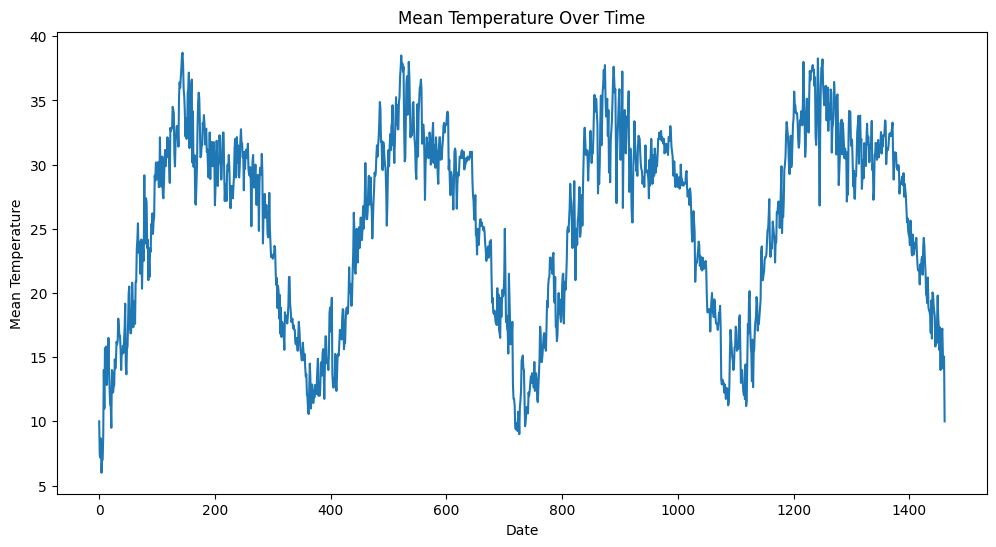

In [112]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset['meantemp'])
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


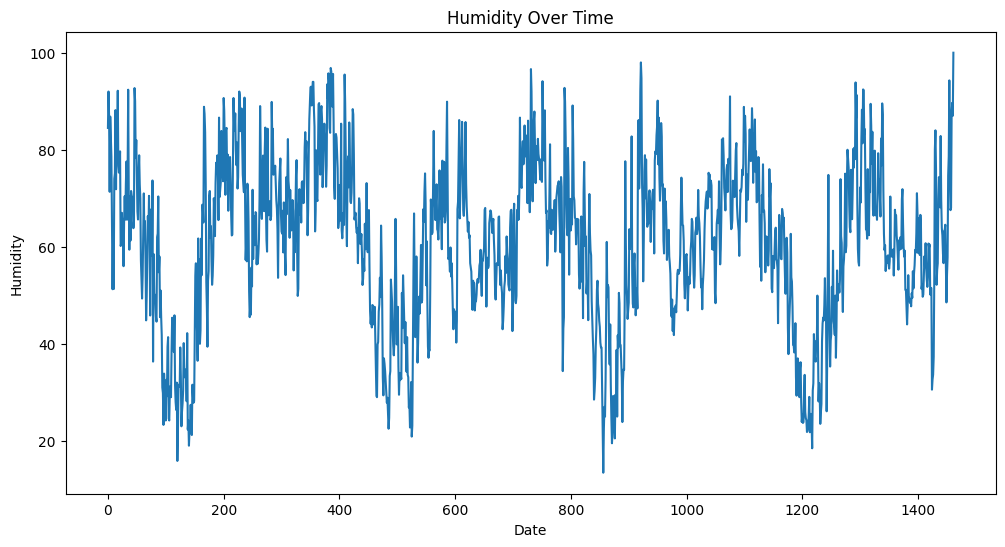

In [113]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset['humidity'])
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()


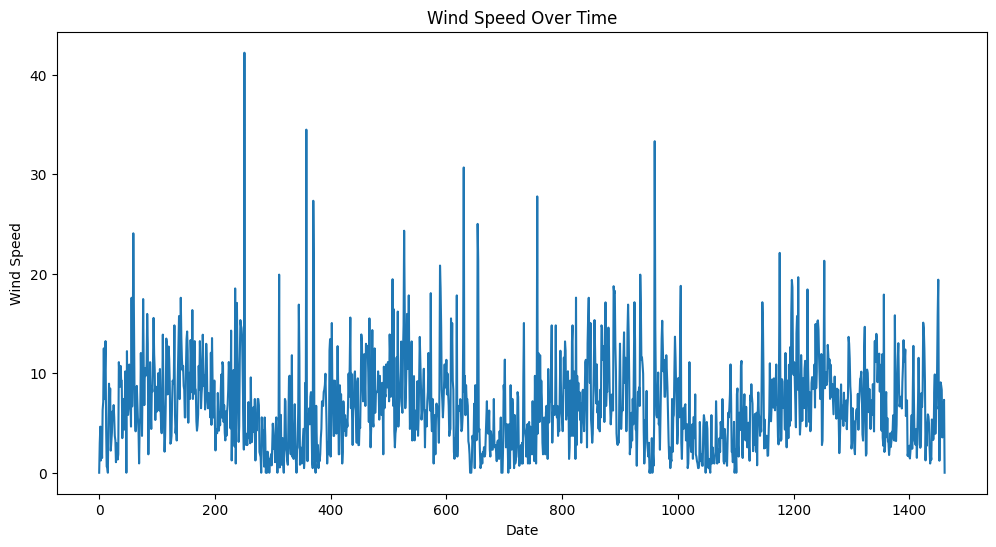

In [114]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset['wind_speed'])
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.show()

In [115]:
dataset.head()

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


In [116]:
from sklearn.preprocessing import MinMaxScaler
from LSTM import lstm

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        # Resetting index to use integer-based indexing
        X.append(data.iloc[i:(i + lookback)].values)
        y.append(data.iloc[i + lookback][0])
    return np.array(X), np.array(y)

In [117]:
# Assuming 'meantemp' is one of the columns in your original DataFrame
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[["meantemp", "humidity", "wind_speed", "meanpressure"]].values)
unscaled_data = dataset[["meantemp", "humidity", "wind_speed", "meanpressure"]].values

# Assuming lookback is 5 (you should adjust based on your requirements)
lookback = 5
X, y = create_sequences(pd.DataFrame(scaled_data), lookback)
u_X,u_y = create_sequences(pd.DataFrame(unscaled_data), lookback)


In [118]:
X

array([[[0.12227074, 0.8209571 , 0.        , 0.13260331],
        [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
        [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        [0.08151383, 0.66886689, 0.02921206, 0.13279856],
        [0.        , 0.84790979, 0.08763619, 0.13271178]],

       [[0.04279476, 0.90759076, 0.07058266, 0.132881  ],
        [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        [0.08151383, 0.66886689, 0.02921206, 0.13279856],
        [0.        , 0.84790979, 0.08763619, 0.13271178],
        [0.03056769, 0.80132013, 0.03505448, 0.13290703]],

       [[0.0356623 , 0.84983498, 0.10974262, 0.13299381],
        [0.08151383, 0.66886689, 0.02921206, 0.13279856],
        [0.        , 0.84790979, 0.08763619, 0.13271178],
        [0.03056769, 0.80132013, 0.03505448, 0.13290703],
        [0.03056769, 0.75280528, 0.14921838, 0.13316737]],

       ...,

       [[0.24454148, 0.93415842, 0.21518238, 0.13243192],
        [0.34061135, 0.70957096, 0.20805804, 0.132770

In [119]:
y

array([0.03056769, 0.03056769, 0.08733624, ..., 0.24745269, 0.276718  ,
       0.12227074])

In [120]:
u_X

array([[[  10.        ,   84.5       ,    0.        , 1015.66666667],
        [   7.4       ,   92.        ,    2.98      , 1017.8       ],
        [   7.16666667,   87.        ,    4.63333333, 1018.66666667],
        [   8.66666667,   71.33333333,    1.23333333, 1017.16666667],
        [   6.        ,   86.83333333,    3.7       , 1016.5       ]],

       [[   7.4       ,   92.        ,    2.98      , 1017.8       ],
        [   7.16666667,   87.        ,    4.63333333, 1018.66666667],
        [   8.66666667,   71.33333333,    1.23333333, 1017.16666667],
        [   6.        ,   86.83333333,    3.7       , 1016.5       ],
        [   7.        ,   82.8       ,    1.48      , 1018.        ]],

       [[   7.16666667,   87.        ,    4.63333333, 1018.66666667],
        [   8.66666667,   71.33333333,    1.23333333, 1017.16666667],
        [   6.        ,   86.83333333,    3.7       , 1016.5       ],
        [   7.        ,   82.8       ,    1.48      , 1018.        ],
        [   7.  

In [121]:
u_y

array([ 7.        ,  7.        ,  8.85714286, ..., 14.0952381 ,
       15.05263158, 10.        ])

In [122]:
# Create an instance of the lstm class
u_lstm_model = lstm(u_X, u_y)
lstm_model = lstm(X,y)
# Train the model
u_trained_model = u_lstm_model.train_it()
trained_model = lstm_model.train_it()

Architecture of the Multi-Stack LSTM Layer is ready!
Architecture of the Multi-Stack LSTM Layer is ready!
Epoch 1/20
46/46 [==============================] - 4s 8ms/step - loss: 478.6111
Epoch 2/20
46/46 [==============================] - 0s 8ms/step - loss: 236.1322
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 177.6132
Epoch 4/20
46/46 [==============================] - 0s 10ms/step - loss: 136.3295
Epoch 5/20
46/46 [==============================] - 0s 9ms/step - loss: 107.5443
Epoch 6/20
46/46 [==============================] - 0s 8ms/step - loss: 87.9845
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 74.7521
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 67.4482
Epoch 9/20
46/46 [==============================] - 0s 10ms/step - loss: 63.7391
Epoch 10/20
46/46 [==============================] - 0s 9ms/step - loss: 59.3329
Epoch 11/20
46/46 [==============================] - 0s 9ms/step - loss: 58.7169
Epoch

### Test data Analysis

In [123]:
# Assuming 'meantemp' is the first column in your test data
test_data = pd.read_csv("Data/DailyDelhiClimateTest.csv")
test_data.drop(['date'], axis=1, inplace=True)


In [124]:
scaled_test_data = scaler.transform(test_data[["meantemp", "humidity", "wind_speed", "meanpressure"]].values)

unscaled_test_data = test_data[["meantemp", "humidity", "wind_speed", "meanpressure"]].values

# Assuming lookback is 5 for the test data as well
U_X_test, U_y_test = create_sequences(pd.DataFrame(unscaled_test_data), lookback)

X_test, y_test = create_sequences(pd.DataFrame(scaled_test_data), lookback)

unscaled_test_predictions = u_lstm_model.predict_it(U_X_test)

scaled_test_predictions = lstm_model.predict_it(X_test)

# # Make predictions
# scaled_predictions = lstm_model.predict_it(X_test)

# # Inverse transform the scaled predictions to get back to the original scale
# unscaled_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], scaled_predictions.reshape(-1, 1)), axis=1))

# # The final unscaled predictions for 'meantemp' will be in the last column
# unscaled_predictions = unscaled_predictions[:, -1]

# # Now, unscaled_predictions should contain the predicted values in the original scale
# unscaled_predictions


4/4 [==============================] - 1s 3ms/step


In [125]:
scaled_test_predictions

array([[0.3233693 ],
       [0.3463926 ],
       [0.3408134 ],
       [0.34871373],
       [0.32562786],
       [0.29721114],
       [0.23913497],
       [0.23117892],
       [0.20276676],
       [0.17810099],
       [0.18099204],
       [0.20605907],
       [0.23055314],
       [0.23671307],
       [0.24676885],
       [0.21443139],
       [0.20290916],
       [0.24195448],
       [0.2781185 ],
       [0.30284417],
       [0.32935607],
       [0.36192513],
       [0.36085904],
       [0.35685468],
       [0.34339172],
       [0.2819563 ],
       [0.28296086],
       [0.27083713],
       [0.2856466 ],
       [0.29043853],
       [0.28876984],
       [0.29446492],
       [0.31804106],
       [0.32104886],
       [0.34932053],
       [0.3275804 ],
       [0.29641506],
       [0.27716884],
       [0.27819932],
       [0.27694705],
       [0.28031096],
       [0.29739937],
       [0.3122909 ],
       [0.33434305],
       [0.36518776],
       [0.40319425],
       [0.4487251 ],
       [0.465

In [126]:
y_test

array([0.40710599, 0.2661936 , 0.2960239 , 0.26200873, 0.18680252,
       0.15283843, 0.17697081, 0.2211662 , 0.22008734, 0.31896715,
       0.26441048, 0.17491509, 0.21524745, 0.26346434, 0.2831533 ,
       0.28707044, 0.38026201, 0.37040843, 0.37744447, 0.45851528,
       0.31113537, 0.3209607 , 0.27094085, 0.29548763, 0.31926249,
       0.30949782, 0.28275109, 0.33902342, 0.29456133, 0.38820961,
       0.38611813, 0.33284813, 0.27893013, 0.29650655, 0.28657205,
       0.26491994, 0.29421397, 0.31331878, 0.31586608, 0.33242358,
       0.35371179, 0.43558952, 0.46768559, 0.46233624, 0.50019849,
       0.53111354, 0.48398836, 0.40120087, 0.38591703, 0.40120087,
       0.39737991, 0.38973799, 0.42412664, 0.52983988, 0.5643265 ,
       0.54257642, 0.44323144, 0.40120087, 0.42030568, 0.4279476 ,
       0.50818777, 0.47518857, 0.45196507, 0.42603712, 0.38311499,
       0.34770742, 0.34983018, 0.36681223, 0.42412664, 0.55021834,
       0.45545852, 0.57138058, 0.5705968 , 0.52983988, 0.58078

### Scaling Up

In [130]:

# Inverse transform the scaled predictions to get back to the original scale
unscaled_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], scaled_test_predictions.reshape(-1, 1)), axis=1))
unscaled_y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))

# The final unscaled predictions for 'meantemp' will be in the last column
unscaled_predictions = unscaled_predictions[:, -1]

# Now, unscaled_predictions should contain the predicted values in the original scale
unscaled_predictions

array([2481.20251644, 2658.07619704, 2615.21466457, 2675.90794262,
       2498.55369048, 2280.24576802, 1834.08282795, 1772.96152299,
       1554.68863028, 1365.19691309, 1387.40703403, 1579.98136925,
       1768.15397595, 1815.4768791 , 1892.72915513, 1644.30068436,
       1555.78256588, 1855.74334814, 2133.56887696, 2323.52078891,
       2527.19520489, 2777.40286644, 2769.21277345, 2738.44978409,
       2635.02227123, 2163.05225014, 2170.76978494, 2077.6307158 ,
       2191.40253683, 2228.21605698, 2215.39654208, 2259.14824232,
       2440.26899395, 2463.37603677, 2680.56964684, 2513.5537501 ,
       2274.12998573, 2126.27330183, 2134.18979645, 2124.56943646,
       2150.41223409, 2281.69183274, 2396.09418928, 2565.50699096,
       2802.46768308, 3094.44774951, 3444.23285673, 3572.28765778,
       3625.73389866, 3701.38396428, 3608.95281663, 3331.39653609,
       3096.36934882, 3105.22500707, 3149.13743205, 3205.92454951,
       3406.31418229, 3729.2996989 , 4012.28490388, 3931.36389

In [128]:
unscaled_y_test

array([[2.92460972e+01, 2.01951682e+01, 5.59118404e+00, 3.12449925e+03],
       [3.08988792e+01, 3.12304995e+01, 5.57711173e+00, 2.04195736e+03],
       [3.71397533e+01, 3.40188469e+01, 5.57492594e+00, 2.27112496e+03],
       [3.24890816e+01, 1.74270150e+01, 5.59787047e+00, 2.00980768e+03],
       [3.14624391e+01, 2.68445944e+01, 5.60008184e+00, 1.43204537e+03],
       [2.81124339e+01, 3.26233787e+01, 5.60522860e+00, 1.17112045e+03],
       [2.81754152e+01, 3.34663554e+01, 5.60461797e+00, 1.35651447e+03],
       [2.91079803e+01, 2.70157250e+01, 5.60236827e+00, 1.69603999e+03],
       [2.62662174e+01, 2.66240382e+01, 5.60874872e+00, 1.68775178e+03],
       [2.89950118e+01, 2.42469243e+01, 5.61595131e+00, 2.44738362e+03],
       [2.83470164e+01, 2.08727194e+01, 5.61205176e+00, 2.02825880e+03],
       [3.05708039e+01, 3.47125939e+01, 5.60666359e+00, 1.34072165e+03],
       [3.28360312e+01, 2.99121833e+01, 5.61347214e+00, 1.65056998e+03],
       [3.05267170e+01, 2.57912804e+01, 5.63308873e

In [131]:
X_test, y_test = create_sequences(pd.DataFrame(scaled_test_data), lookback)

# Make predictions
scaled_predictions = lstm_model.predict_it(X_test)

# Inverse transform the scaled predictions to get back to the original scale
unscaled_predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], scaled_predictions.reshape(-1, 1)), axis=1))

# The final unscaled predictions for 'meantemp' will be in the last column
unscaled_predictions = unscaled_predictions[:, -1]

# Inverse transform the scaled y_test to get back to the original scale
unscaled_y_test = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))

# The final unscaled y_test for 'meantemp' will be in the last column
unscaled_y_test = unscaled_y_test[:, -1]

4/4 [==============================] - 0s 5ms/step


In [132]:
unscaled_y_test

array([3124.49924739, 2041.95735535, 2271.12496169, 2009.80767831,
       1432.04536633, 1171.12045124, 1356.51446985, 1696.0399863 ,
       1687.75178311, 2447.38362287, 2028.25879731, 1340.72164605,
       1650.56998271, 2020.99017467, 2172.24815177, 2202.34109392,
       2918.27368268, 2842.57476025, 2896.62825929, 3519.44468705,
       2387.21693049, 2462.69878093, 2078.42754234, 2267.00509461,
       2449.65253518, 2374.63662209, 2169.15825146, 2601.46339487,
       2259.88896057, 2979.33011281, 2963.2626312 , 2554.02250121,
       2139.80419851, 2274.83284207, 2198.5123044 , 2032.17267103,
       2257.2204103 , 2403.99067504, 2423.56004367, 2550.76093977,
       2714.30494905, 3343.32036936, 3589.89441412, 3548.79873999,
       3839.6707192 , 4077.17169305, 3715.13837336, 3079.13389283,
       2961.71768104, 3079.13389283, 3049.77983988, 2991.07173399,
       3255.25821052, 4067.38700873, 4332.32615329, 4165.23385189,
       3402.02847525, 3079.13389283, 3225.90415757, 3284.61226